In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
 
from sklearn.preprocessing import StandardScaler, MinMaxScaler


df = pd.read_csv("./data/wine.csv", index_col = 0)
 
# scaler = StandardScaler()
scaler = MinMaxScaler()
 
col = df.columns
df = pd.DataFrame(scaler.fit_transform(df), columns = col)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,0.500000
1,1.0,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,0.500000
2,1.0,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,0.500000
3,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,0.500000
4,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.0,0.198347,0.346667,0.048193,0.021472,0.134551,0.107639,0.087558,0.150183,0.565891,0.202247,0.362319,0.333333
6493,0.0,0.173554,0.313333,0.060241,0.024540,0.088040,0.131944,0.103687,0.154425,0.620155,0.303371,0.463768,0.500000
6494,0.0,0.206612,0.286667,0.078313,0.026074,0.111296,0.097222,0.078341,0.166377,0.542636,0.297753,0.434783,0.500000
6495,0.0,0.173554,0.376667,0.072289,0.021472,0.109635,0.107639,0.087558,0.161172,0.658915,0.275281,0.318841,0.333333


In [12]:
from sklearn.svm import SVC, SVR

x = df.iloc[:,1:-1]
y = df['type']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=42)

In [16]:
model = SVC(C=1, gamma = 10) #c가 높을 수록 오류를 허용하지 않음
model.fit(x_train, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",10
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [17]:
print('train accuracy:', model.score(x_train, y_train))
print('test accuracy:', model.score(x_test, y_test))

train accuracy: 0.9967011216186497
test accuracy: 0.9943589743589744


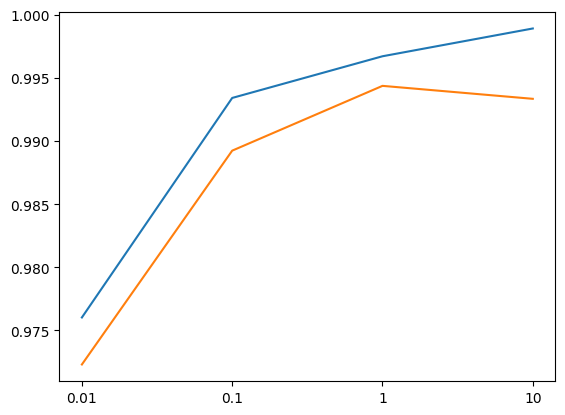

In [19]:
ta = [] #train accuracy

ts = [] #test accuracy

for i in [0.01, 0.1, 1, 10]:

    model = SVC(C = i, gamma = 10)

    model.fit(x_train, y_train)

    ta.append(model.score(x_train, y_train))

    ts.append(model.score(x_test, y_test))

plt.plot(["0.01", "0.1", "1", "10"], ta)

plt.plot(["0.01", "0.1", "1", "10"], ts)
#C가 높아질수록 과대적합이 발생할 수 있고, 낮을 수록 과소적합이 발생
#그래프에서 둘다 낮으면 과소적합, ta는 높고 ts는 낮으면 과대적합

In [22]:
y=df['quality']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=42)
model = SVR(C=1, gamma = 10) 
model.fit(x_train, y_train)

,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm.If none is given, 'rbf' will be used. If a callable is given it isused to precompute the kernel matrix.For an intuitive visualization of different kernel typessee :ref:`sphx_glr_auto_examples_svm_plot_svm_regression.py`",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",10
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.The penalty is a squared l2. For an intuitive visualization of theeffects of scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-SVR model. It specifies the epsilon-tubewithin which no penalty is associated in the training loss functionwith points predicted within a distance epsilon from the actualvalue. Must be non-negative.",0.1
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False
,"max_iter max_iter: int, default=-1Hard limit on iterations within solver, or -1 for no limit.",-1


In [23]:
print('train R2:', model.score(x_train, y_train))
print('test R2:', model.score(x_test, y_test))

train R2: 0.5251397551890802
test R2: 0.37668321572802554


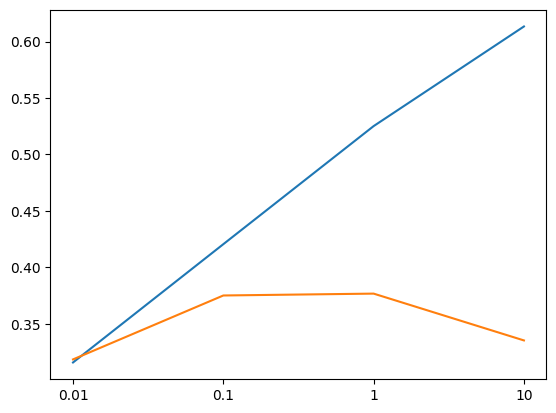

In [24]:
ta = [] #train accuracy

ts = [] #test accuracy

for i in [0.01, 0.1, 1, 10]:

    model = SVR(C = i, gamma = 10)

    model.fit(x_train, y_train)

    ta.append(model.score(x_train, y_train))

    ts.append(model.score(x_test, y_test))

plt.plot(["0.01", "0.1", "1", "10"], ta, label = 'train_R2')

plt.plot(["0.01", "0.1", "1", "10"], ts,label = 'test_R2')

In [44]:
#OVR OVO

df = pd.read_csv("./data/wine.csv", index_col = 0)
qual = df['quality']
 
# scaler = StandardScaler()
scaler = MinMaxScaler()
 
col = df.columns
df = pd.DataFrame(scaler.fit_transform(df), columns = col)
df['quality'] = qual
df['quality'] = df['quality']-3
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,3
1,1.0,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,3
2,1.0,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,3
3,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,3
4,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.0,0.198347,0.346667,0.048193,0.021472,0.134551,0.107639,0.087558,0.150183,0.565891,0.202247,0.362319,2
6493,0.0,0.173554,0.313333,0.060241,0.024540,0.088040,0.131944,0.103687,0.154425,0.620155,0.303371,0.463768,3
6494,0.0,0.206612,0.286667,0.078313,0.026074,0.111296,0.097222,0.078341,0.166377,0.542636,0.297753,0.434783,3
6495,0.0,0.173554,0.376667,0.072289,0.021472,0.109635,0.107639,0.087558,0.161172,0.658915,0.275281,0.318841,2


In [31]:
x = df.iloc[:,1:-1]
y = df['quality']

In [38]:
 df['quality'].unique()

array([3, 2, 4, 5, 1, 0, 6])

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=42)
model = SVC(C=1, gamma = 10)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.5769230769230769

In [37]:
 df['quality'].value_counts()
#3과 그 외로 ovr

quality
3    2836
2    2138
4    1079
1     216
5     193
0      30
6       5
Name: count, dtype: int64

In [46]:
df['temp'] = [ 1 if i ==3  else 0 for i in df['quality']]
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,temp
0,1.0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,3,1
1,1.0,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,3,1
2,1.0,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,3,1
3,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,3,1
4,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.0,0.198347,0.346667,0.048193,0.021472,0.134551,0.107639,0.087558,0.150183,0.565891,0.202247,0.362319,2,0
6493,0.0,0.173554,0.313333,0.060241,0.024540,0.088040,0.131944,0.103687,0.154425,0.620155,0.303371,0.463768,3,1
6494,0.0,0.206612,0.286667,0.078313,0.026074,0.111296,0.097222,0.078341,0.166377,0.542636,0.297753,0.434783,3,1
6495,0.0,0.173554,0.376667,0.072289,0.021472,0.109635,0.107639,0.087558,0.161172,0.658915,0.275281,0.318841,2,0


In [48]:
x = df.iloc[:,1:-2]
y=df['temp']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=42)
model = SVC(C=1, gamma = 10) 
model.fit(x_train, y_train)
print('train accuracy:', model.score(x_train, y_train))
print('test accuracy:', model.score(x_test, y_test))

train accuracy: 0.6802287222344403
test accuracy: 0.6087179487179487


In [49]:
x_test['prediction'] = model.predict(x_test)
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,prediction
3103,0.264463,0.113333,0.271084,0.026074,0.059801,0.135417,0.258065,0.068055,0.341085,0.146067,0.565217,1
1419,0.314050,0.040000,0.445783,0.015337,0.051495,0.090278,0.223502,0.086563,0.271318,0.101124,0.405797,1
4761,0.198347,0.046667,0.162651,0.159509,0.043189,0.156250,0.253456,0.171776,0.310078,0.089888,0.159420,1
4690,0.239669,0.053333,0.192771,0.182515,0.043189,0.059028,0.345622,0.184114,0.124031,0.078652,0.144928,0
4032,0.247934,0.126667,0.132530,0.263804,0.041528,0.052083,0.253456,0.227299,0.271318,0.174157,0.173913,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4294,0.297521,0.093333,0.168675,0.128834,0.061462,0.072917,0.264977,0.145942,0.294574,0.185393,0.405797,1
3757,0.223140,0.120000,0.204819,0.012270,0.051495,0.083333,0.410138,0.097359,0.441860,0.134831,0.391304,1
5954,0.421488,0.266667,0.319277,0.052147,0.152824,0.006944,0.009217,0.168691,0.379845,0.207865,0.594203,0
4418,0.231405,0.093333,0.138554,0.256135,0.063123,0.125000,0.258065,0.230384,0.279070,0.134831,0.115942,1


In [53]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("./data/wine.csv", index_col = 0)
scaler = MinMaxScaler()
 
col = df.columns
df = pd.DataFrame(scaler.fit_transform(df), columns = col)
x = df.iloc[:,1:-1]
y=df['type']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=42)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,0.500000
1,1.0,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,0.500000
2,1.0,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,0.500000
3,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,0.500000
4,1.0,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.0,0.198347,0.346667,0.048193,0.021472,0.134551,0.107639,0.087558,0.150183,0.565891,0.202247,0.362319,0.333333
6493,0.0,0.173554,0.313333,0.060241,0.024540,0.088040,0.131944,0.103687,0.154425,0.620155,0.303371,0.463768,0.500000
6494,0.0,0.206612,0.286667,0.078313,0.026074,0.111296,0.097222,0.078341,0.166377,0.542636,0.297753,0.434783,0.500000
6495,0.0,0.173554,0.376667,0.072289,0.021472,0.109635,0.107639,0.087558,0.161172,0.658915,0.275281,0.318841,0.333333


In [54]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(x_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [55]:
print('train accuracy:', model.score(x_train, y_train))
print('test accuracy:', model.score(x_test, y_test))

train accuracy: 0.9953815702661095
test accuracy: 0.9907692307692307
